![png](../../../imagenes/logotipo-axity-ppt.png)

# Clustering Jerárquico

## Los datos

Utilizaremos un conjunto de datos de UCI [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality). Los dos conjuntos de datos corresponden a las variantes de vino tinto y blanco del vino portugués "Vinho Verde".  

Contiene características psicoquímicas y sensoriales de 1599 muestras de vino tinto y 4898 muestras de vino blanco.

* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulfates
* alcohol
* quality: calificación entre 0 y 10

Usaremos los datos correspondientes al vino tinto

### Importar las librerías

### Importar el archivo winequality-red.csv

### Verificar los datos con head(), info(), describe()

In [ ]:
#Escribe tu código aqui


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [ ]:
#Escribe tu código aqui


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Escribe tu código aqui


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

### Realizar un histograma sobre quality

In [ ]:
#Escribe tu código aqui


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

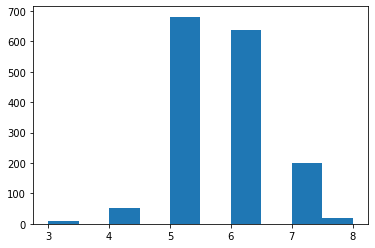

### Realizar un groupby por la columna quality

In [ ]:
#Escribe tu código aqui


fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104   
6         0.084956            15.711599             40.869906  0.996615   
7         0.076588            14.045226             35.020101  0.996104   
8         0.068444            13.277778             33.444444  0.995212   

               pH  sulphates    alcohol  
quality                                  
3        3.398000   0.570000   9.955000  
4        3.381509   0.596415  10.265094  
5        3.304949   0.620969   9.899706  
6        3.318072   0.675329  10.629519  
7        3.290754   0.741256  11.465913  
8        3.267222   0.767778  12.094444

### Normaliza los datos mediante la formula (df-df.min())/(df.max()-df.min()) y visualiza la información con un head()

In [ ]:
#Escribe tu código aqui


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.215385      0.4  
2  0.215385      0.4  
3  0.215385      0.6  
4  0.153846      0.4

## Crea el modelo de Clustering jerárquico con sklearn.cluster y AgglomerativeClustering

In [23]:
#Importa la librería


In [24]:
clus= AgglomerativeClustering(n_clusters=6, linkage="ward").fit(df_norm)

In [25]:
md_h = pd.Series(clus.labels_)

### Realiza un histograma de md_h

In [ ]:
#Escribe tu código aqui


Text(0, 0.5, 'Número de vinos del cluster')

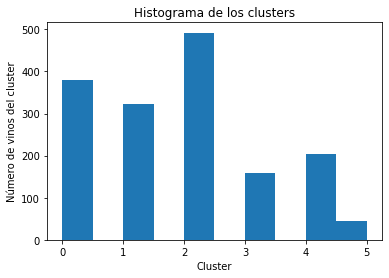

### Importa scipy.cluster.hierarchy con dendrogram, linkage. Genera el dendograma, con metodo ward

### Genera una gráfica de dendograma

In [ ]:
#Escribe tu código aqui


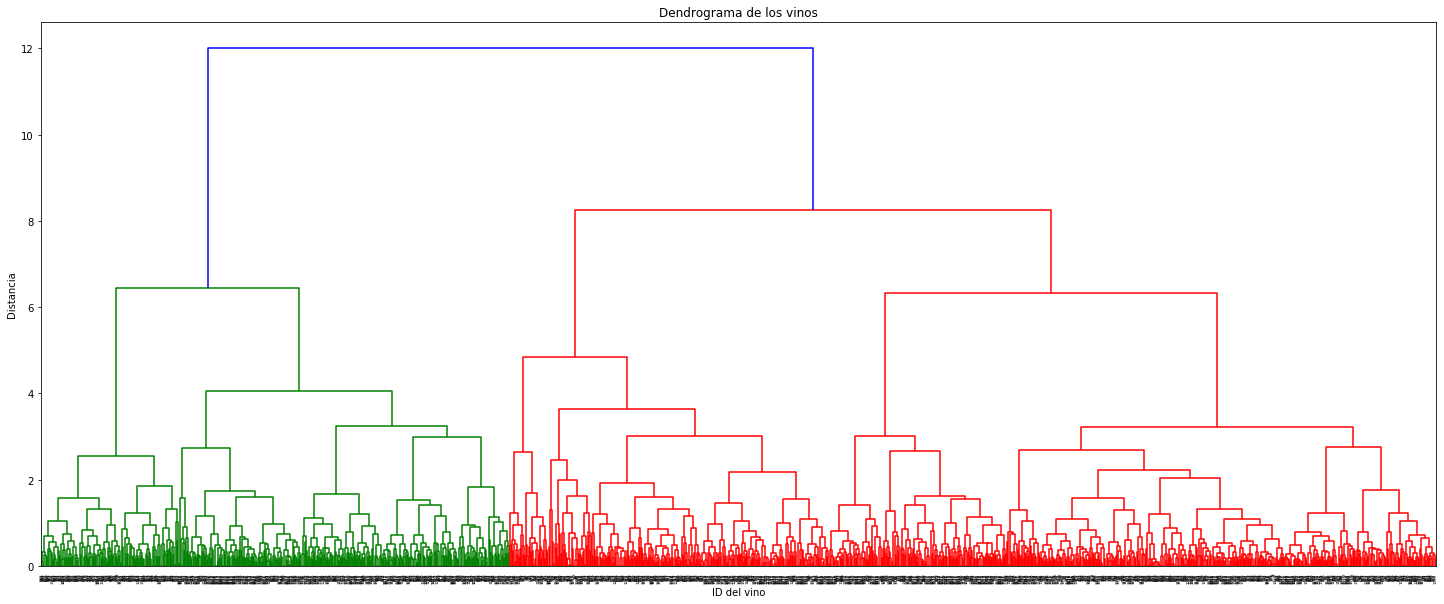

## K-means

### Importa kmeans y datasets de sklearn

### Cree el modelo de Kmeans llamado model, 6 clusters

In [ ]:
#Escribe tu código aqui


KMeans(n_clusters=6)

In [42]:
md_k = pd.Series(model.labels_)

In [43]:
df_norm["clust_h"] = md_h
df_norm["clust_k"] = md_k

In [44]:
df_norm.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  clust_h  clust_k  
0  0.153846      0.4        2        4  
1  0.215385      0.4        2        4  
2  0.215385      0.4        2        4  
3  0.215385      0.6        3        2  
4  0.153846      0.4        2        4

### Construye un histograma sobre md_k

In [ ]:
#Escribe tu código aqui


(array([280.,   0., 220.,   0., 246.,   0., 315.,   0., 508.,  30.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

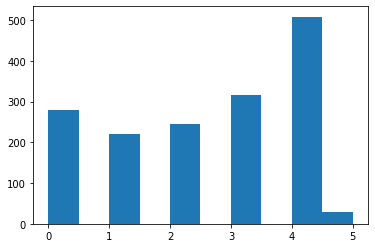

In [39]:
model.cluster_centers_

array([[0.36166245, 0.15994374, 0.4195    , 0.10391389, 0.10674934,
        0.16272636, 0.08533569, 0.41656965, 0.42244094, 0.23588537,
        0.47774725, 0.68857143],
       [0.17304907, 0.32334994, 0.09159091, 0.09327522, 0.09518136,
        0.25496159, 0.12690331, 0.32130557, 0.58031496, 0.1860098 ,
        0.49296037, 0.61272727],
       [0.58263184, 0.2063565 , 0.51191057, 0.13459183, 0.13061742,
        0.13838314, 0.09148496, 0.65695773, 0.33118878, 0.22216543,
        0.29034813, 0.54715447],
       [0.3179941 , 0.28097412, 0.30292063, 0.15262013, 0.12723852,
        0.3782249 , 0.29718997, 0.54121856, 0.43444569, 0.17787283,
        0.21102157, 0.45269841],
       [0.26259494, 0.35962275, 0.1178937 , 0.0913669 , 0.12258949,
        0.14543363, 0.10707827, 0.49014592, 0.48775498, 0.15520534,
        0.22161821, 0.44133858],
       [0.33716814, 0.29223744, 0.48133333, 0.07557078, 0.53789649,
        0.20938967, 0.21071849, 0.5143906 , 0.2335958 , 0.59001996,
        0.16512821,

In [40]:
model.inertia_

186.54820577586554

## Interpretación final, utiliza groupby por la columna clust_k

In [ ]:
#Escribe tu código aqui


fixed acidity  volatile acidity  citric acid  residual sugar  \
clust_k                                                                 
0             0.361662          0.159944     0.419500        0.103914   
1             0.173049          0.323350     0.091591        0.093275   
2             0.582632          0.206356     0.511911        0.134592   
3             0.317994          0.280974     0.302921        0.152620   
4             0.262595          0.359623     0.117894        0.091367   
5             0.337168          0.292237     0.481333        0.075571   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
clust_k                                                                   
0         0.106749             0.162726              0.085336  0.416570   
1         0.095181             0.254962              0.126903  0.321306   
2         0.130617             0.138383              0.091485  0.656958   
3         0.127239             0.378225              0.297190  0.541219   
4         0.122589             0.145434              0.107078  0.490146   
5         0.537896             0.209390              0.210718  0.514391   

               pH  sulphates   alcohol   quality   clust_h  
clust_k                                                     
0        0.422441   0.235885  0.477747  0.688571  0.142857  
1        0.580315   0.186010  0.492960  0.612727  3.459091  
2        0.331189   0.222165  0.290348  0.547154  2.052846  
3        0.434446   0.177873  0.211022  0.452698  1.057143  
4        0.487755   0.155205  0.221618  0.441339  2.027559  
5        0.233596   0.590020  0.165128  0.466667  4.900000